In [1]:
# Success Through Sports Analytics
# AUTHOR : Zane Dalco
# DATE : December 4th, 2024

In [2]:
# Importing Libraries Needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Loading

# Loading the dataset
file_path = 'team_stats_2003_2023.csv' 
df = pd.read_csv(file_path)

# Only Display the first few rows of the dataset to get a understanding of it
print(df.head())

# Allows us to Get a quick summary of the dataset
print(df.info())

# Gives us a Basic descriptive statistics
print(df.describe())


   year                  team  wins  losses  win_loss_perc  points  \
0  2003  New England Patriots    14       2          0.875     348   
1  2003        Miami Dolphins    10       6          0.625     311   
2  2003         Buffalo Bills     6      10          0.375     243   
3  2003         New York Jets     6      10          0.375     283   
4  2003      Baltimore Ravens    10       6          0.625     391   

   points_opp  points_diff  mov   g  ...  rush_td  rush_yds_per_att  rush_fd  \
0         238          110  6.9  16  ...        9               3.4       91   
1         261           50  3.1  16  ...       14               3.7       99   
2         279          -36 -2.3  16  ...       13               3.9       96   
3         299          -16 -1.0  16  ...        8               4.0       78   
4         281          110  6.9  16  ...       18               4.8      115   

   penalties  penalties_yds  pen_fd  score_pct  turnover_pct  exp_pts_tot  \
0        111         

In [3]:
# Data "Cleaning" / Handling Missing Values 

df = df.fillna(0)  # Replace the NaN values with 0

# Convert relevant columns to numeric for easier use
numeric_columns = [
    'total_yards', 'turnovers', 'fumbles_lost', 'pass_int', 
    'win_loss_perc', 'wins', 'points_diff', 'rush_yds', 'pass_yds'
]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop the rows that have remaining NaNs in key columns
df = df.dropna(subset=numeric_columns)

# Confirm / Show the data cleaning
print(df.isnull().sum())  # Should Show all Zero's 


year                    0
team                    0
wins                    0
losses                  0
win_loss_perc           0
points                  0
points_opp              0
points_diff             0
mov                     0
g                       0
total_yards             0
plays_offense           0
yds_per_play_offense    0
turnovers               0
fumbles_lost            0
first_down              0
pass_cmp                0
pass_att                0
pass_yds                0
pass_td                 0
pass_int                0
pass_net_yds_per_att    0
pass_fd                 0
rush_att                0
rush_yds                0
rush_td                 0
rush_yds_per_att        0
rush_fd                 0
penalties               0
penalties_yds           0
pen_fd                  0
score_pct               0
turnover_pct            0
exp_pts_tot             0
ties                    0
dtype: int64


In [4]:
# Data Analysis - Descriptive Statistics

# Summarize The key statistics
print("Basic Statistics for The Key Variables:\n")
print(df[['wins', 'total_yards', 'turnovers', 'win_loss_perc']].describe().round(2))

Basic Statistics for The Key Variables:

         wins  total_yards  turnovers  win_loss_perc
count  672.00       672.00     672.00         672.00
mean     8.05      5463.90      24.71           0.50
std      3.09       628.21       6.60           0.19
min      0.00      3587.00       8.00           0.00
25%      6.00      5030.25      20.00           0.38
50%      8.00      5467.50      24.00           0.50
75%     10.00      5900.25      29.00           0.62
max     16.00      7474.00      46.00           1.00


In [5]:
# Identify Team With the Most Wins
most_wins = df.loc[df['wins'].idxmax()]
print(f"Team With the Most Wins in a Single Season:\n\n{most_wins}")

Team With the Most Wins in a Single Season:

year                                    2007
team                    New England Patriots
wins                                      16
losses                                     0
win_loss_perc                            1.0
points                                   589
points_opp                               274
points_diff                              315
mov                                     19.7
g                                         16
total_yards                             6580
plays_offense                           1058
yds_per_play_offense                     6.2
turnovers                                 15
fumbles_lost                               6
first_down                               393
pass_cmp                                 403
pass_att                                 586
pass_yds                                4731
pass_td                                   50
pass_int                                   9
pass_net_y

In [6]:
# Identify Team With the Least Wins in a Single Season
least_wins = df.loc[df['wins'].idxmin()]
print(f"Team with the Least Wins in a Single Season:\n\n{least_wins}")

Team with the Least Wins in a Single Season:

year                             2008
team                    Detroit Lions
wins                                0
losses                             16
win_loss_perc                     0.0
points                            268
points_opp                        517
points_diff                      -249
mov                               0.0
g                                  16
total_yards                      4292
plays_offense                     913
yds_per_play_offense              4.7
turnovers                          29
fumbles_lost                       10
first_down                        234
pass_cmp                          281
pass_att                          509
pass_yds                         2960
pass_td                            18
pass_int                           19
pass_net_yds_per_att              5.3
pass_fd                           143
rush_att                          352
rush_yds                         1332
rush

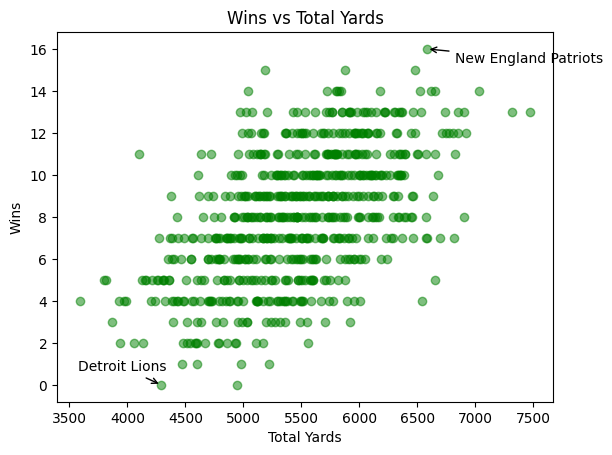

In [7]:
# Scatter plot:  Wins vs. Total Yards - (Most Wins VS Most Losses)
plt.scatter(df['total_yards'], df['wins'], alpha=0.5, color='green')
plt.title('Wins vs Total Yards')
plt.xlabel('Total Yards')
plt.ylabel('Wins')


plt.annotate(most_wins['team'], # Find Team With Most Wins (Patriots)
             (most_wins['total_yards'], most_wins['wins']), # (Y Axis - X - Axis)
             xytext=(20, -10), # ( Positioning for Better Visual )
             textcoords='offset points', # (Ensures Position ) 
             arrowprops=dict(arrowstyle='->')) # ( Arrow )

plt.annotate(least_wins['team'], # Find Team With Least Wins (Lions)
             (least_wins['total_yards'], least_wins['wins']), 
             xytext=(-60, 10), 
             textcoords='offset points', 
             arrowprops=dict(arrowstyle='->'))

plt.show()


In [8]:
# Identify Team With the Most Total Yards
most_yards = df.loc[df['total_yards'].idxmax()]
print(f"Team With the Most Total Yards:\n\n{most_yards}")

Team With the Most Total Yards:

year                                  2011
team                    New Orleans Saints
wins                                    13
losses                                   3
win_loss_perc                        0.813
points                                 547
points_opp                             339
points_diff                            208
mov                                   13.0
g                                       16
total_yards                           7474
plays_offense                         1117
yds_per_play_offense                   6.7
turnovers                               19
fumbles_lost                             5
first_down                             416
pass_cmp                               472
pass_att                               662
pass_yds                              5347
pass_td                                 46
pass_int                                14
pass_net_yds_per_att                   7.8
pass_fd              

In [9]:
# Identify Team With the Lowest Total Yards
least_yards = df.loc[df['total_yards'].idxmin()]
print(f"Team With the Least Total Yards:\n\n{least_yards}")

Team With the Least Total Yards:

year                                   2005
team                    San Francisco 49ers
wins                                      4
losses                                   12
win_loss_perc                          0.25
points                                  239
points_opp                              428
points_diff                            -189
mov                                   -11.8
g                                        16
total_yards                            3587
plays_offense                           865
yds_per_play_offense                    4.1
turnovers                                35
fumbles_lost                             14
first_down                              191
pass_cmp                                204
pass_att                                389
pass_yds                               1898
pass_td                                   8
pass_int                                 21
pass_net_yds_per_att                    4.

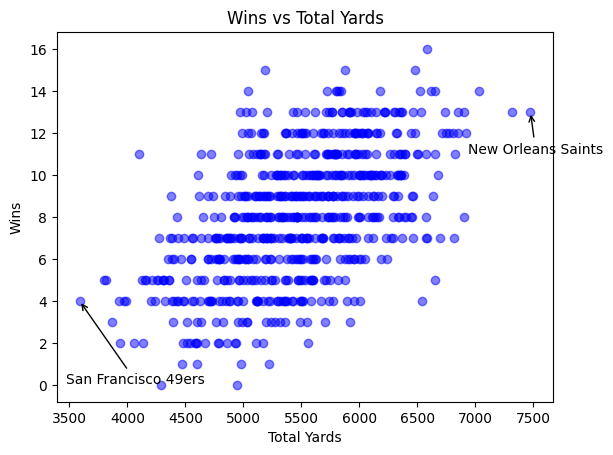

In [10]:
# Scatter plot for Wins vs. Total Yards ( Most vs Least Yards)
plt.scatter(df['total_yards'], df['wins'], alpha=0.5, color='blue')
plt.title('Wins vs Total Yards')
plt.xlabel('Total Yards')
plt.ylabel('Wins')


plt.annotate(most_yards['team'], # Find Team With Most Yards
             (most_yards['total_yards'], most_yards['wins']), # ( Y / X Axis )
             xytext=(-45, -30), # ( Positioning for Better Visual )
             textcoords='offset points', # ( Ensures Position )
             arrowprops=dict(arrowstyle='->')) # ( Arrow )

plt.annotate(least_yards['team'], # Find Team with Least Yards
             (least_yards['total_yards'], least_yards['wins']),
             xytext=(-10, -60), 
             textcoords='offset points', 
             arrowprops=dict(arrowstyle='->'))

plt.show()


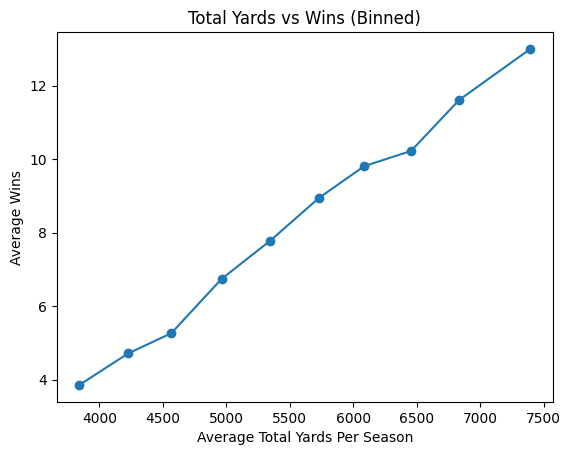

In [11]:
# Data Aggregation ( Grouping , Aggregation , Binning )

# Bin total yards into intervals ( Group into Ranges - Easier To Analyze ) 
df['yards_bin'] = pd.cut(df['total_yards'], bins=10)  # Automatic Binning by 10 width interval

# Calculate Average Wins and total_yards For Each Bin
# Bins Range [3500 - 4000] , [4000 - 4500] etc.
binned_data = df.groupby('yards_bin', observed=False).agg({'total_yards': 'mean', 'wins': 'mean'})

# Plot the Averages
plt.plot(binned_data['total_yards'], binned_data['wins'], marker='o', linestyle='-')
plt.title('Total Yards vs Wins (Binned)')
plt.xlabel('Average Total Yards Per Season')
plt.ylabel('Average Wins')
plt.show()


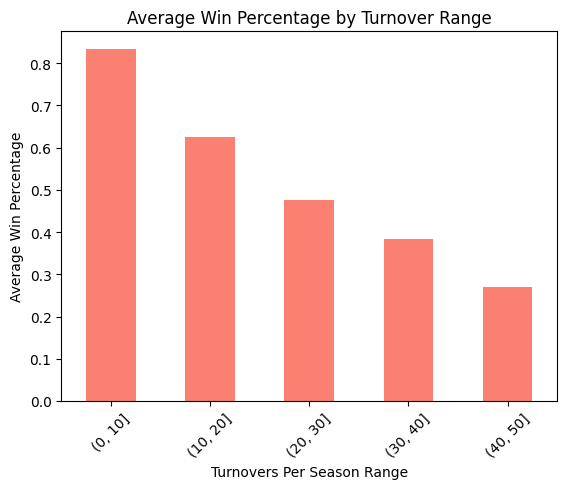

In [12]:
# More Data Aggregation 

# Total Turnovers Column
df['total_turnovers'] = df['fumbles_lost'] + df['pass_int']

# Group by Ranges of Turnovers and Calculate the Average Win Percentage
df['turnovers_range'] = pd.cut(df['total_turnovers'], bins=[0, 10, 20, 30, 40, 50])

# Group Data by Turnover Ranges and Calculate the Average Win Percentage For Each Range
avg_win_perc_by_turnovers = df.groupby('turnovers_range', observed=False)['win_loss_perc'].mean()

# Plotting using Bar Chart
avg_win_perc_by_turnovers.plot(kind='bar', color='salmon')
plt.title('Average Win Percentage by Turnover Range')
plt.xlabel('Turnovers Per Season Range')
plt.ylabel('Average Win Percentage')
plt.xticks(rotation=45)
plt.show()
